In [ ]:
!pip install keras
!pip install keras_preprocessing
!pip install tensorflow
!pip install kaggle
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
# Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from datasets import Dataset


# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model

# Torch Libraries
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Subset

# System Libraries
from pathlib import Path
import os
import os.path
import random

# Visualization Libraries
import matplotlib.cm as cm
import cv2
import seaborn as sns
from PIL import Image, ImageChops, ImageEnhance

# Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Model
from tensorflow.keras.applications import MobileNetV2,ResNet50, ResNet50V2
from transformers import ViTFeatureExtractor, ViTForImageClassification, Trainer, TrainingArguments

# Extra
import zipfile
from termcolor import colored
#from google.colab import drive
import cv2
from skimage.feature import canny
from collections import defaultdict, Counter

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
# !ls "/kaggle/input/dataset"
# dir = "/kaggle/input/dataset"

In [ ]:
PATH = '/kaggle/input/deepfakesss/similar'
PATH_styletransfer = '/kaggle/input/deepfakesss/similar/style_transfer'
PATH_inpainting = '/kaggle/input/deepfakesss/similar/inpainting'
PATH_old = '/kaggle/input/dataset'
images = []
class_list = []
labels_class = ['Original', 'AI Generated']
labels_class

['Original', 'AI Generated']

In [ ]:
folder_path = PATH_inpainting
max_images_per_class = 20

# Initialize list and counters
image_data = []
class_0_count = 0
class_1_count = 0

# Iterate through class folders
for class_name in os.listdir(folder_path):
    class_path = os.path.join(folder_path, class_name)
    if not os.path.isdir(class_path):
        continue  # Skip if it's not a directory

    for file in os.listdir(class_path):
        # Stop if both class limits are reached
        if class_0_count >= max_images_per_class and class_1_count >= max_images_per_class:
            break

        file_path = os.path.join(class_path, file)

        # Append file paths and labels
        if file == 'original.png' and class_0_count < max_images_per_class:
            image_data.append((file_path, 0))
            class_0_count += 1
        elif file == 'inpainting.png' and class_1_count < max_images_per_class:
            image_data.append((file_path, 1))
            class_1_count += 1

# Create DataFrame from collected data
dataset = pd.DataFrame(image_data, columns=['file_path', 'label'])

# Display the DataFrame
dataset

,file_path,label
0,/kaggle/input/deepfakesss/similar/inpainting/1...,0
1,/kaggle/input/deepfakesss/similar/inpainting/1...,1
2,/kaggle/input/deepfakesss/similar/inpainting/2...,0
3,/kaggle/input/deepfakesss/similar/inpainting/2...,1
4,/kaggle/input/deepfakesss/similar/inpainting/4...,0
5,/kaggle/input/deepfakesss/similar/inpainting/4...,1
6,/kaggle/input/deepfakesss/similar/inpainting/1...,0
7,/kaggle/input/deepfakesss/similar/inpainting/1...,1
8,/kaggle/input/deepfakesss/similar/inpainting/1...,0
9,/kaggle/input/deepfakesss/similar/inpainting/1...,1


In [ ]:
class_0_count = 0
class_1_count = 0
max_images_per_class = 10
new_data = []

# Iterate through each class in the style_transfer folder
for class_name in os.listdir(PATH_styletransfer):
    class_path = os.path.join(PATH_styletransfer, class_name)

    if not os.path.isdir(class_path):
        continue  # Skip if not a folder

    for file in os.listdir(class_path):
        if class_0_count >= max_images_per_class and class_1_count >= max_images_per_class:
            break  # Stop if both types of images have reached the limit

        file_path = os.path.join(class_path, file)

        # Append file paths and labels to new_data
        if file.endswith("original.png") and class_0_count < max_images_per_class:
            new_data.append((file_path, 0))
            class_0_count += 1
        elif file.endswith("generated.png") and class_1_count < max_images_per_class:
            new_data.append((file_path, 1))
            class_1_count += 1

    # Reset counts for the next class
    class_0_count = 0
    class_1_count = 0

# Convert new_data to a DataFrame
new_df = pd.DataFrame(new_data, columns=['file_path', 'label'])

# Append to the existing DataFrame
if 'dataset' in locals():  # Check if the existing DataFrame exists
    dataset = pd.concat([dataset, new_df], ignore_index=True)
else:
    dataset = new_df  # If no existing DataFrame, use new_df as the dataset

dataset

,file_path,label
0,/kaggle/input/deepfakesss/similar/inpainting/1...,0
1,/kaggle/input/deepfakesss/similar/inpainting/1...,1
2,/kaggle/input/deepfakesss/similar/inpainting/2...,0
3,/kaggle/input/deepfakesss/similar/inpainting/2...,1
4,/kaggle/input/deepfakesss/similar/inpainting/4...,0
...,...,...
575,/kaggle/input/deepfakesss/similar/style_transf...,1
576,/kaggle/input/deepfakesss/similar/style_transf...,0
577,/kaggle/input/deepfakesss/similar/style_transf...,0
578,/kaggle/input/deepfakesss/similar/style_transf...,0


In [ ]:
max_images_per_class = 20

# Initialize the list for all images
all_images = []

# Iterate through all subdirectories in the folder
for class_name in os.listdir(PATH_old):
    class_path = os.path.join(PATH_old, class_name)

    # Check if the path is a directory
    if os.path.isdir(class_path):
        # Assign label 1 if "AI" is in the folder name, otherwise 0
        label = 1 if "AI" in class_name else 0

        # Collect file paths and labels
        class_images = [(os.path.join(class_path, file_name), label) for file_name in os.listdir(class_path)]

        # Limit the number of images per class
        all_images.extend(class_images[:max_images_per_class])

# Convert the collected data into a DataFrame
new_df = pd.DataFrame(all_images, columns=['file_path', 'label'])

# Combine with the existing dataset if it exists
if 'dataset' in locals() and isinstance(dataset, pd.DataFrame):  # Check if 'dataset' exists and is a DataFrame
    dataset = pd.concat([dataset, new_df], ignore_index=True)  # Append the new data to the existing dataset
else:
    dataset = new_df  # If no existing DataFrame, initialize 'dataset' with 'new_df'

# Display the combined DataFrame
dataset

,file_path,label
0,/kaggle/input/deepfakesss/similar/inpainting/1...,0
1,/kaggle/input/deepfakesss/similar/inpainting/1...,1
2,/kaggle/input/deepfakesss/similar/inpainting/2...,0
3,/kaggle/input/deepfakesss/similar/inpainting/2...,1
4,/kaggle/input/deepfakesss/similar/inpainting/4...,0
...,...,...
935,/kaggle/input/dataset/realism/theodor-severin-...,0
936,/kaggle/input/dataset/realism/ippolito-caffi_r...,0
937,/kaggle/input/dataset/realism/alexey-venetsian...,0
938,/kaggle/input/dataset/realism/rosa-bonheur_thr...,0


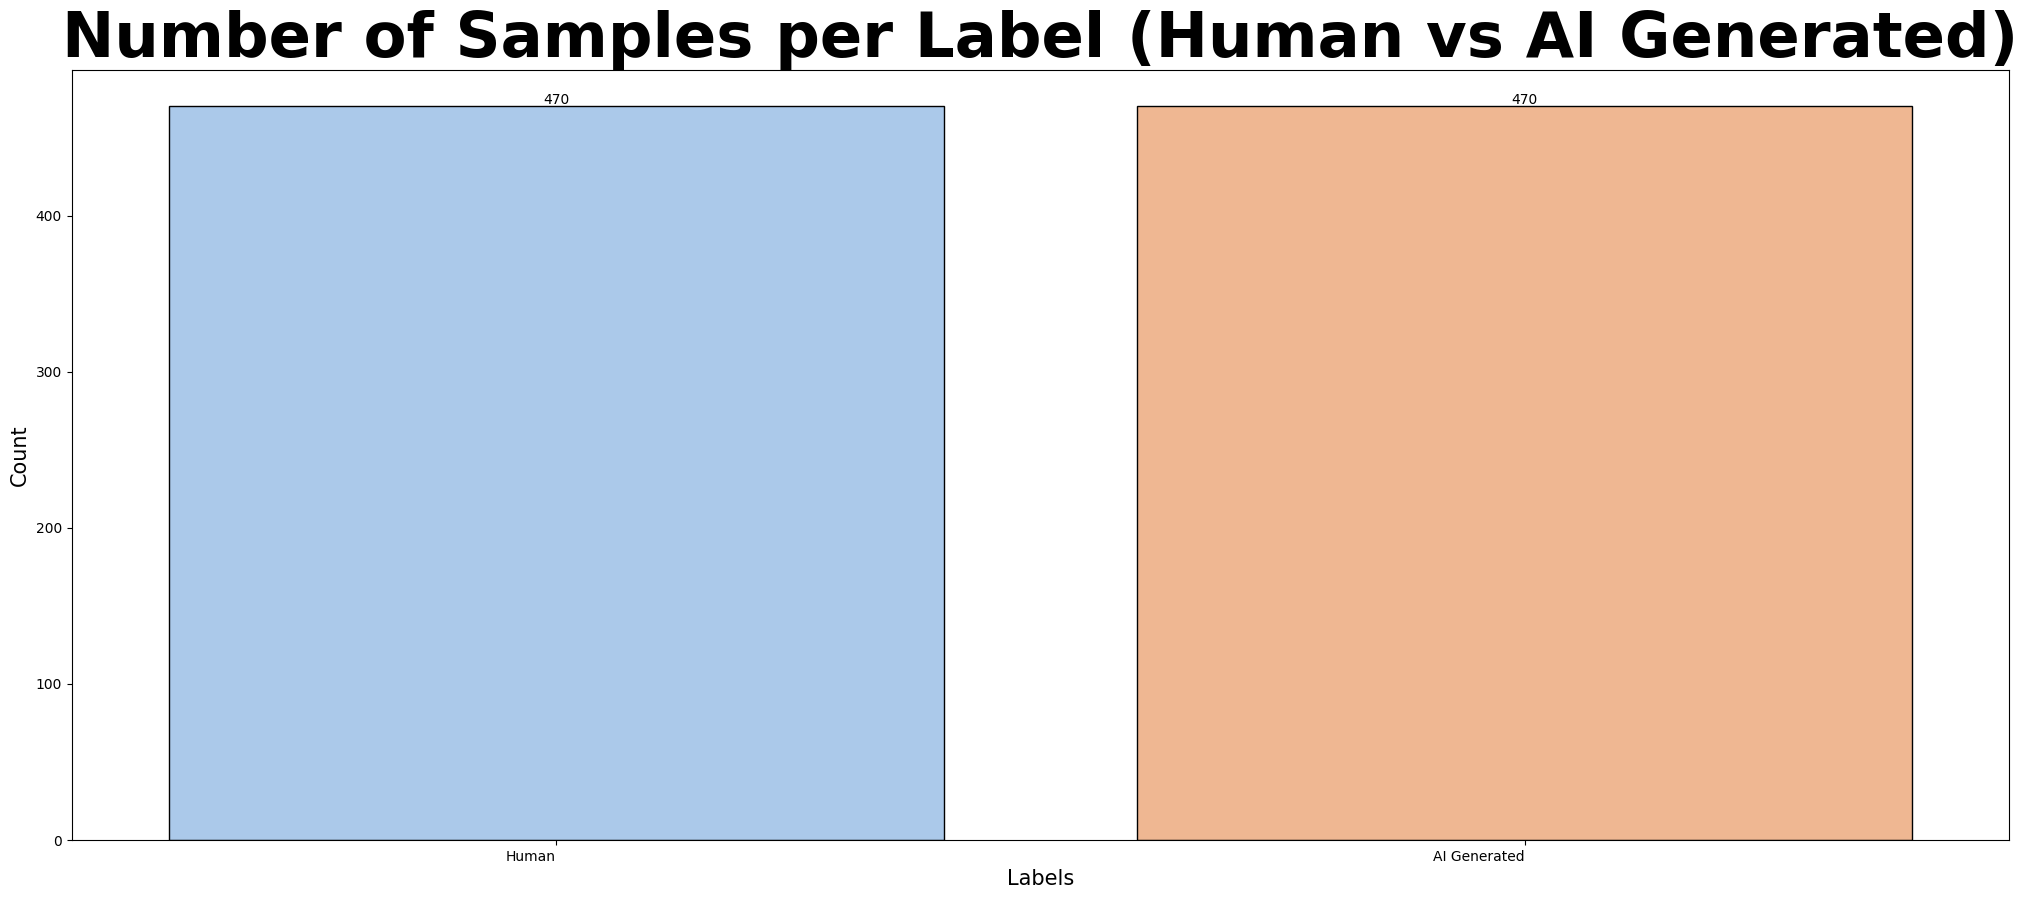

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of samples per label
label_counts = dataset['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']  # Rename columns for clarity

# Map the labels (0 to 'Human', 1 to 'AI Generated')
label_counts['label'] = label_counts['label'].map({0: 'Human', 1: 'AI Generated'})

# Plotting
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=label_counts, x='label', y='count', edgecolor='black', palette='pastel')

# Adding labels to the bars
for i in ax.containers:
    ax.bar_label(i)

# Set plot title and labels
plt.title('Number of Samples per Label (Human vs AI Generated)', fontsize=45, fontweight='bold')
plt.xlabel('Labels', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(ha='right')
plt.show()


In [ ]:
def preprocess_image(image_path, size=(224, 224)):
    # Load the image from the file path
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    # Resize the image to the given size
    image_resized = cv2.resize(image, size)

    return image_resized

In [ ]:
import cv2
import numpy as np
from skimage.feature import canny

# Edge feature extraction with grayscale conversion
def edge_features(image, thresholds=(100, 200)):
    # Convert to grayscale first
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detector
    edges = canny(gray_image, sigma=1.0)

    return edges.flatten()

def hsv_histogram_features(image, bins=(8, 8, 8)):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()

    return hist


In [ ]:
def extract_features(image):
    # Preprocess image
    image = preprocess_image(image)

    # Extract individual features
    hsv_feat = hsv_histogram_features(image)

    return hsv_feat

In [ ]:
dataset['features'] = dataset['file_path'].apply(extract_features)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
dataset['label_encoded'] = label_encoder.fit_transform(dataset['label'])

X = np.vstack(dataset['features'].values)
y = dataset['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_))

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 89.36%


<Figure size 1600x600 with 0 Axes>

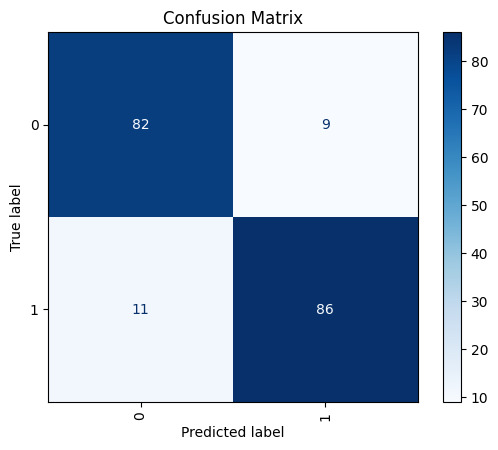

Accuracy: 89.36%


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(16, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')

plt.xticks(rotation=90)

plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
import joblib
joblib.dump(xgb_model, 'xgb_model_hsv.pkl')

['xgb_model_hsv.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=400)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 89.36%


<Figure size 1600x600 with 0 Axes>

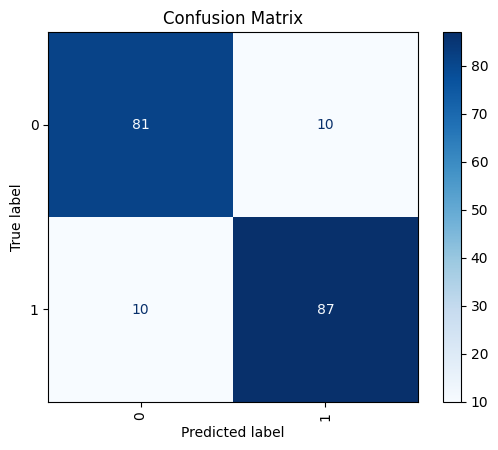

Accuracy: 89.36%


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(16, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')

plt.xticks(rotation=90)

plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
import joblib
joblib.dump(rf_model, 'rf_model_hsv.pkl')

['rf_model_hsv.pkl']